In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q1** Please use Pandas to read olympic_medals.csv and use parallel_categories function from plotly.express to visualize proportions of medal type for each gender from since year 2000. Please see the example in the Python notebook we walked through in the class.

In [2]:
#please use this cell to read and select your data
file_path = "/content/drive/MyDrive/MS/Data viz/olympic_medals.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,GBR,25:05.17
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.64
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.26
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.17
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.77


In [3]:
#Please use this cell to create your your figure. Please use Year column to color your graph.
# Filter data from year 2000 onwards
df = df[df["Year"] >= 2000]

# Create parallel categories plot
fig = px.parallel_categories(df,
                             dimensions=["Year", "Medal", "Gender"],
                             color="Year",
                             color_continuous_scale=px.colors.sequential.Plasma)

# Show the plot
fig.show()

**Q2** Please inspect the code below and observe how values are plotted by running it. Then, read the 2016elections.csv from the DATA folder and select rows for AR, MI, CA, and WI. Then, utilize stacked bar plot, to stack vote percentages for Trump, Clinton, Johnson, and Others. Please see 'pct_clinton',	'pct_trump',	'pct_johnson',	'pct_other' columns. Make sure that your x tick labels are those four states above.

In [4]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # create DataFrame
# df = pd.DataFrame({'High Temp': [28, 30, 34, 38, 45, 42,
#                                  38, 35, 32, 28, 25, 21],
#                    'Low Temp': [22, 26, 30, 32, 41, 38,
#                                 32, 31, 28, 22, 15, 15],
#                    'Avg Temp': [25, 28, 32, 35, 43, 40,
#                                 35, 33, 30, 25, 20, 18]},
#                   index=['Jan', 'Feb', 'Mar', 'Apr', 'May',
#                          'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
#                          'Nov', 'Dec'])


# # create stacked bar chart for monthly temperatures
# df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])

# # labels for x & y axis
# plt.xlabel('Months')
# plt.ylabel('Temp ranges in Degree Celsius')

# # title of plot
# plt.title('Monthly Temperatures in a year')

In [5]:
file_path = "/content/drive/MyDrive/MS/Data viz/2016elections.csv"
df = pd.read_csv(file_path)
df.head()

,state,st,fips,total_vote,vote_margin,winner,party,pct_margin,r_points,d_points,...,pct_johnson,pct_other,clinton_vote,trump_vote,johnson_vote,other_vote,ev_dem,ev_rep,ev_oth,census
0,Alabama,AL,1,2123372,588708,Trump,Republican,0.2773,27.72,-27.72,...,2.09,1.46,729547,1318255,44467,31103,0,9,0,South
1,Alaska,AK,2,318608,46933,Trump,Republican,0.1473,14.73,-14.73,...,5.88,6.29,116454,163387,18725,20042,0,3,0,West
2,Arizona,AZ,4,2604657,91234,Trump,Republican,0.0350,3.50,-3.50,...,4.08,3.25,1161167,1252401,106327,84762,0,11,0,West
3,Arkansas,AR,5,1130635,304378,Trump,Republican,0.2692,26.92,-26.92,...,2.64,3.13,380494,684872,29829,35440,0,6,0,South
4,California,CA,6,14237893,4269978,Clinton,Democratic,0.2999,-29.99,29.99,...,3.36,3.66,8753792,4483814,478500,521787,55,0,0,West


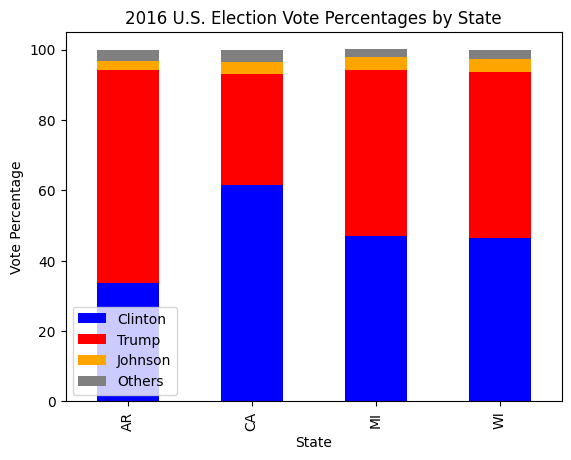

In [10]:
# Filter data for selected states
selected_states = ["AR", "MI", "CA", "WI"]
df_selected = df[df["st"].isin(selected_states)]

# Set state abbreviations as index for plotting
df_selected.set_index("st", inplace=True)

# Select relevant columns for vote percentages
df_selected = df_selected[["pct_clinton", "pct_trump", "pct_johnson", "pct_other"]]

# Plot the stacked bar chart
df_selected.plot(kind="bar", stacked=True,
                 color=["blue", "red", "orange", "gray"])

# Labels and title
plt.xlabel("State")
plt.ylabel("Vote Percentage")
plt.title("2016 U.S. Election Vote Percentages by State")

# Display legend
plt.legend(["Clinton", "Trump", "Johnson", "Others"])

# Show plot
plt.show()